### Step 1: Analyst Mindset (Before Touching the Data)

McKinsey analysts never start with data, they start with questions.

Ask:

What business problem are we solving?
→ Example: “Why is customer churn increasing?” or “How to increase customer retention?”

Who is the audience? (CXO, Product, Marketing, Finance?)
→ This decides how deep or visual your analysis will be.

What decisions will my insights drive?
→ Example: New marketing campaign, better pricing, or loyalty program?

In [3]:
import pandas as pd
df = pd.read_csv("Customer_Data.csv")
df.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,46251,2020-09-08 09:38:32,Electronics,12,3,740,Credit Card,37,0.0,Christine Hernandez,37,Male,0
1,46251,2022-03-05 12:56:35,Home,468,4,2739,PayPal,37,0.0,Christine Hernandez,37,Male,0
2,46251,2022-05-23 18:18:01,Home,288,2,3196,PayPal,37,0.0,Christine Hernandez,37,Male,0
3,46251,2020-11-12 13:13:29,Clothing,196,1,3509,PayPal,37,0.0,Christine Hernandez,37,Male,0
4,13593,2020-11-27 17:55:11,Home,449,1,3452,Credit Card,49,0.0,James Grant,49,Female,1


In [4]:
# Step 1: Understanding the dataset
df.shape

(250000, 13)

In [5]:
# Find the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   Payment Method         250000 non-null  object 
 7   Customer Age           250000 non-null  int64  
 8   Returns                202404 non-null  float64
 9   Customer Name          250000 non-null  object 
 10  Age                    250000 non-null  int64  
 11  Gender                 250000 non-null  object 
 12  Churn                  250000 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 24.8+ MB


In [6]:
df.sample(5) # sample 5 rows

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
48358,11461,2020-12-22 07:29:46,Electronics,349,2,1423,PayPal,44,NaN,Christina Gordon,44,Male,1
32248,20931,2022-10-22 22:33:38,Books,401,5,487,Credit Card,27,0.0,Valerie Jones,27,Female,0
42371,29101,2023-05-11 07:57:16,Home,56,5,4043,Credit Card,39,NaN,Matthew Baker,39,Female,0
33418,47470,2020-04-03 12:59:41,Clothing,80,1,4910,Credit Card,28,0.0,Bethany Webster,28,Male,0
161052,30242,2020-12-14 23:11:13,Electronics,306,5,3367,Credit Card,57,1.0,Amber Oconnor,57,Male,0


###🧹 Step 2: Data Familiarization (What You Just Did ✅)

You already ran .isnull().sum() — that’s data understanding.
Now, interpret it like a pro:

Column	Nulls	Meaning / Action
Returns	47,596	Huge missing values → investigate why
Others	0	Clean data, good to go

Next Step: Find data types & unique values

df.info()
df.nunique()


Helps you know: numeric vs categorical, continuous vs discrete.

In [12]:
df.isnull().sum()

Customer ID              0
Purchase Date            0
Product Category         0
Product Price            0
Quantity                 0
Total Purchase Amount    0
Payment Method           0
Customer Age             0
Returns                  0
Customer Name            0
Age                      0
Gender                   0
Churn                    0
dtype: int64

In [9]:
# we have the Returns column null let's fill this with 'Unknown'
df['Returns'].fillna('Unknown',inplace=True)
df.head()

C:\Users\Jayasurya R N\AppData\Local\Temp\ipykernel_12244\1484634924.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Returns'].fillna('Unknown',inplace=True)
C:\Users\Jayasurya R N\AppData\Local\Temp\ipykernel_12244\1484634924.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['Returns'].fillna('Unknown',inplace=True)


,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,46251,2020-09-08 09:38:32,Electronics,12,3,740,Credit Card,37,0.0,Christine Hernandez,37,Male,0
1,46251,2022-03-05 12:56:35,Home,468,4,2739,PayPal,37,0.0,Christine Hernandez,37,Male,0
2,46251,2022-05-23 18:18:01,Home,288,2,3196,PayPal,37,0.0,Christine Hernandez,37,Male,0
3,46251,2020-11-12 13:13:29,Clothing,196,1,3509,PayPal,37,0.0,Christine Hernandez,37,Male,0
4,13593,2020-11-27 17:55:11,Home,449,1,3452,Credit Card,49,0.0,James Grant,49,Female,1


In [13]:
# Find the unique values
df.nunique()

Customer ID               49673
Purchase Date            249736
Product Category              4
Product Price               491
Quantity                      5
Total Purchase Amount      5247
Payment Method                4
Customer Age                 53
Returns                       3
Customer Name             39920
Age                          53
Gender                        2
Churn                         2
dtype: int64


## 🎯 Step 1: Understand What “Unique Values” Tell You

👉 `df.nunique()` helps you understand **data variety**:

* **Low unique values** → categorical features (like Gender, Payment Method)
* **High unique values** → identifier or numeric/continuous features (like Customer ID, Price, Age)

Let’s decode your results 👇

---

## 🧩 Step 2: Interpret Each Column Like a Pro Analyst

| Column                           | Unique Count                | What It Means                           | Analyst Interpretation                                                                                                                                |
| -------------------------------- | --------------------------- | --------------------------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Customer ID (49,673)**         | Almost unique per row       | Each represents a unique customer.      | ✅ Likely a *unique identifier*. You’ll use it for **customer-level analysis** (like retention, churn).                                                |
| **Purchase Date (249,736)**      | Very high                   | Many unique dates/timestamps            | 🕓 Indicates **daily or transactional** data — maybe multiple purchases per day. You can extract **month, year, weekday** from it for trend analysis. |
| **Product Category (4)**         | Very low                    | 4 unique categories                     | 🎁 Categorical feature — you can group and analyze revenue or churn **by category**.                                                                  |
| **Product Price (491)**          | Moderate                    | 491 different prices                    | 💰 Continuous variable — useful for price range and spending pattern analysis.                                                                        |
| **Quantity (5)**                 | Low                         | 1 to 5 quantities per order             | 🔢 Discrete numeric variable — can analyze **average items per purchase**.                                                                            |
| **Total Purchase Amount (5247)** | Moderate                    | Many possible totals                    | 💸 Continuous — depends on price × quantity; used for **revenue analysis**.                                                                           |
| **Payment Method (4)**           | Low                         | 4 types (e.g., Credit, Debit, UPI, COD) | 💳 You can find which **payment method** customers prefer and if it affects churn.                                                                    |
| **Customer Age (53)**            | Medium                      | Age groups from maybe 18–70             | 👶👴 Helps find **high-value age segments**. You can bin into groups (e.g., 18–25, 26–35…).                                                           |
| **Returns (3)**                  | Very low                    | 3 categories (Yes/No/Null)              | 🔁 Indicates whether the product was returned — valuable for **quality or satisfaction analysis**.                                                    |
| **Customer Name (39,920)**       | High                        | Unique per customer                     | 🧍 Redundant since we already have `Customer ID`. You can safely **drop this column** later.                                                          |
| **Age (53)**                     | Duplicate of `Customer Age` | Same count                              | 🧩 Possibly redundant column — check if values match.                                                                                                 |
| **Gender (2)**                   | Very low                    | 2 categories (Male/Female)              | ⚖️ Use to analyze **gender-wise purchasing behavior**.                                                                                                |
| **Churn (2)**                    | Very low                    | Yes/No                                  | 🚪 Super important target variable — use it to analyze **who is leaving** and **why**.                                                                |

---

## 🔍 Step 3: Identify Feature Types

| Feature Type               | Columns                                                            | Description                                    |
| -------------------------- | ------------------------------------------------------------------ | ---------------------------------------------- |
| **Identifiers**            | `Customer ID`, `Customer Name`                                     | Unique to each record — not used for analysis. |
| **Categorical**            | `Gender`, `Payment Method`, `Product Category`, `Returns`, `Churn` | Use for grouping or segmentation.              |
| **Numerical (Continuous)** | `Product Price`, `Total Purchase Amount`, `Customer Age`, `Age`    | Use for averages, correlations, and trends.    |
| **Numerical (Discrete)**   | `Quantity`                                                         | Small fixed number range.                      |
| **Date/Time**              | `Purchase Date`                                                    | Use for time-series trends.                    |

---

## 📈 Step 4: What Insights You Can Derive

Now that you understand the structure, you can start planning **insight paths** like this:

| Analysis Type        | Question                                              | Why It’s Valuable                     |
| -------------------- | ----------------------------------------------------- | ------------------------------------- |
| **Demographic**      | Which age or gender spends the most?                  | Target marketing campaigns.           |
| **Product**          | Which categories drive the most revenue or returns?   | Improve inventory decisions.          |
| **Payment Behavior** | Which payment method is preferred by loyal customers? | Optimize payment UX and partnerships. |
| **Churn Analysis**   | What kind of customers churn the most?                | Retain high-value customers.          |
| **Trend Analysis**   | How do purchases vary over months?                    | Forecast demand and seasonality.      |

---

## 🧠 Step 5: Pro Analyst Next Steps

Here’s what you should do next (just like a McKinsey associate):

1. **Check column datatypes:**

   ```python
   df.info()
   ```
2. **Convert date column:**

   ```python
   df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])
   ```
3. **Create derived columns:**

   ```python
   df['Month'] = df['Purchase Date'].dt.month
   df['Year'] = df['Purchase Date'].dt.year
   df['Weekday'] = df['Purchase Date'].dt.day_name()
   ```
4. **Check duplicates:**

   ```python
   df.duplicated().sum()
   ```
5. **Handle redundant columns (`Customer Name`, `Age`)**

   ```python
   df.drop(['Customer Name', 'Age'], axis=1, inplace=True)
   ```


In [15]:
#Checking column datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Customer ID            250000 non-null  int64 
 1   Purchase Date          250000 non-null  object
 2   Product Category       250000 non-null  object
 3   Product Price          250000 non-null  int64 
 4   Quantity               250000 non-null  int64 
 5   Total Purchase Amount  250000 non-null  int64 
 6   Payment Method         250000 non-null  object
 7   Customer Age           250000 non-null  int64 
 8   Returns                250000 non-null  object
 9   Customer Name          250000 non-null  object
 10  Age                    250000 non-null  int64 
 11  Gender                 250000 non-null  object
 12  Churn                  250000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 24.8+ MB


In [23]:
# Converting the snake case to better analysis.
df.columns = df.columns.str.strip().str.lower().str.replace(' ','_')
# Purchase Date is in Object format, let's convert it into date format


In [27]:
# Create derived columns
df['month'] = df['purchase_date'].dt.month
df['year'] = df['purchase_date'].dt.year
df['weekday'] = df['purchase_date'].dt.day_name()

In [28]:
df.head()

,customer_id,purchase_date,product_category,product_price,quantity,total_purchase_amount,payment_method,customer_age,returns,customer_name,age,gender,churn,month,year,weekday
0,46251,2020-09-08 09:38:32,Electronics,12,3,740,Credit Card,37,0.0,Christine Hernandez,37,Male,0,9,2020,Tuesday
1,46251,2022-03-05 12:56:35,Home,468,4,2739,PayPal,37,0.0,Christine Hernandez,37,Male,0,3,2022,Saturday
2,46251,2022-05-23 18:18:01,Home,288,2,3196,PayPal,37,0.0,Christine Hernandez,37,Male,0,5,2022,Monday
3,46251,2020-11-12 13:13:29,Clothing,196,1,3509,PayPal,37,0.0,Christine Hernandez,37,Male,0,11,2020,Thursday
4,13593,2020-11-27 17:55:11,Home,449,1,3452,Credit Card,49,0.0,James Grant,49,Female,1,11,2020,Friday


In [29]:
# Handling the redundant columns(customername, Age)
df.drop(['customer_name','age'],axis=1,inplace=True)


## 🧩 What Does “Redundant Column” Mean?

> A **redundant column** means a column that **repeats information already available elsewhere** in the dataset — so it **adds no new value** to your analysis.

It’s like having **duplicate data under a different name**.

---

### 🧠 Simple Example:

| Customer ID | Customer Name | Age | Customer Age |
| ----------- | ------------- | --- | ------------ |
| 101         | John          | 28  | 28           |
| 102         | Priya         | 33  | 33           |

Here:

* Both **`Age`** and **`Customer Age`** represent the **same information**.
* So one of them (say `Age`) is **redundant** — you can safely drop it.

---

### 🧮 Another Example:

| Total Purchase Amount | Product Price | Quantity |
| --------------------- | ------------- | -------- |
| 2000                  | 1000          | 2        |

Here,
`Total Purchase Amount` = `Product Price × Quantity`

So, if that relationship always holds true,
then `Total Purchase Amount` is **derived from** other columns —
it’s **redundant** from a raw data perspective.
You may keep it for convenience, but it’s **not new information**.

---

### 🕵️‍♂️ Why Analysts Remove Redundant Columns

Because:

1. ✅ It **simplifies analysis** (less confusion, faster computation)
2. ✅ Avoids **double-counting** or incorrect insights
3. ✅ Keeps your model or dashboard **clean and meaningful**

---

### 🧠 Pro Tip (McKinsey Style Thought Process)

Whenever you find two similar columns, ask:

> “Does this column add *new information* that others don’t?”

If **No**, → It’s redundant.
If **Yes**, → Keep it.

---

### ⚙️ In Your Dataset:

| Column                  | Redundant? | Reason                                                                                    |
| ----------------------- | ---------- | ----------------------------------------------------------------------------------------- |
| `Customer Name`         | ✅ Yes      | You already have a unique `Customer ID`.                                                  |
| `Age` vs `Customer Age` | ✅ Yes      | Both store the same data (keep only one).                                                 |
| `Total Purchase Amount` | ⚠️ Maybe   | If it’s always equal to `Price × Quantity`, it’s derived (but useful for quick analysis). |




In [31]:
df.head()

,customer_id,purchase_date,product_category,product_price,quantity,total_purchase_amount,payment_method,customer_age,returns,gender,churn,month,year,weekday
0,46251,2020-09-08 09:38:32,Electronics,12,3,740,Credit Card,37,0.0,Male,0,9,2020,Tuesday
1,46251,2022-03-05 12:56:35,Home,468,4,2739,PayPal,37,0.0,Male,0,3,2022,Saturday
2,46251,2022-05-23 18:18:01,Home,288,2,3196,PayPal,37,0.0,Male,0,5,2022,Monday
3,46251,2020-11-12 13:13:29,Clothing,196,1,3509,PayPal,37,0.0,Male,0,11,2020,Thursday
4,13593,2020-11-27 17:55:11,Home,449,1,3452,Credit Card,49,0.0,Female,1,11,2020,Friday


In [32]:
df['purchase_date'] = pd.to_datetime(df['purchase_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   customer_id            250000 non-null  int64         
 1   purchase_date          250000 non-null  datetime64[ns]
 2   product_category       250000 non-null  object        
 3   product_price          250000 non-null  int64         
 4   quantity               250000 non-null  int64         
 5   total_purchase_amount  250000 non-null  int64         
 6   payment_method         250000 non-null  object        
 7   customer_age           250000 non-null  int64         
 8   returns                250000 non-null  object        
 9   gender                 250000 non-null  object        
 10  churn                  250000 non-null  int64         
 11  month                  250000 non-null  int32         
 12  year                   250000 non-null  int3


## 🧠 Step 1: What `df.info()` Really Tells You

It gives 4 key diagnostic layers:

| Layer                 | What It Means                                                                                      |
| --------------------- | -------------------------------------------------------------------------------------------------- |
| **1. RangeIndex**     | Total number of rows → dataset size & coverage                                                     |
| **2. Columns**        | Variables/features available for analysis                                                          |
| **3. Non-null Count** | Data completeness (any missing values?)                                                            |
| **4. Dtype**          | Nature of each variable (numeric, categorical, datetime) — which decides what analysis is possible |

---

## 🧩 Step 2: Read This Like a McKinsey Consultant

Let’s interpret your dataset column-by-column — translating **technical info → business understanding → analytical potential** 👇

| Column                    | Data Type | Completeness | Business Meaning                                           | Analytical Use                                                                                          |
| ------------------------- | --------- | ------------ | ---------------------------------------------------------- | ------------------------------------------------------------------------------------------------------- |
| **customer_id**           | int64     | ✅ Complete   | Unique customer identifier                                 | Use for *customer-level segmentation, retention, churn*. Don’t aggregate by this directly — it’s an ID. |
| **purchase_date**         | datetime  | ✅ Complete   | When purchase happened                                     | Enables *trend analysis*, *seasonality*, and *lifecycle tracking*.                                      |
| **product_category**      | object    | ✅ Complete   | Category of item bought (e.g., electronics, fashion, etc.) | For *category-wise revenue, returns, churn analysis*.                                                   |
| **product_price**         | int64     | ✅ Complete   | Price per unit                                             | Used for *pricing analytics, basket size*, and *revenue contribution*.                                  |
| **quantity**              | int64     | ✅ Complete   | Number of units purchased                                  | Helps compute *average order size* and *purchase frequency*.                                            |
| **total_purchase_amount** | int64     | ✅ Complete   | Total value of purchase                                    | Direct measure of *sales performance*. Primary metric for business insights.                            |
| **payment_method**        | object    | ✅ Complete   | Payment channel used (UPI, Credit, COD, etc.)              | For *customer preference* and *conversion optimization* insights.                                       |
| **customer_age**          | int64     | ✅ Complete   | Age of customer                                            | Key demographic for *segment targeting* and *customer profiling*.                                       |
| **returns**               | object    | ✅ Complete   | Product returned or not                                    | Identifies *pain points or quality issues*. Also used for *customer satisfaction* analysis.             |
| **customer_name**         | object    | ✅ Complete   | Actual name                                                | Not analytically useful; redundant (drop later).                                                        |
| **age**                   | int64     | ✅ Complete   | Duplicate of `customer_age`                                | Check correlation — drop duplicate later.                                                               |
| **gender**                | object    | ✅ Complete   | Male/Female                                                | Essential for *demographic analysis* and *marketing segmentation*.                                      |
| **churn**                 | int64     | ✅ Complete   | Customer left (1) or stayed (0)                            | 🎯 Target variable for *churn prediction* and *retention strategies*.                                   |

---

## 🎯 Step 3: What This Means Strategically (McKinsey View)

If this dataset came from a **retail client**, here’s how a McKinsey consultant would summarize it:

> **“The dataset represents 250K customer purchase transactions across multiple categories, with demographic, behavioral, and transactional details. It’s clean, complete, and ready for descriptive and predictive analysis. The data allows us to understand customer lifetime value, churn patterns, product profitability, and demographic preferences.”**

✅ Data readiness: **Excellent**
✅ Analytical potential: **High**
✅ Cleaning needed: **Minimal** (just drop redundant columns)

---

## 💡 Step 4: Segment Data Into Analytical Buckets

At McKinsey or Google, analysts group data into **4 pillars** to plan their analysis roadmap:

| Analytical Pillar         | Columns                                                       | Purpose                                               |
| ------------------------- | ------------------------------------------------------------- | ----------------------------------------------------- |
| **Customer Demographics** | customer_id, customer_age, gender, churn                      | Who are our customers? (profiles, retention)          |
| **Transaction Details**   | purchase_date, product_price, quantity, total_purchase_amount | What do they buy, how much, and how often?            |
| **Product Insights**      | product_category, returns                                     | Which products/categories drive or hurt business?     |
| **Behavioral Factors**    | payment_method, churn                                         | How do customers behave (buying channel, churn risk)? |

This breakdown gives **clarity** on what kinds of analysis to perform next.

---

## 🧮 Step 5: Decide Your Analysis Type

### A. **Descriptive Analysis (What Happened?)**

* Total revenue, total customers, average purchase value
* Revenue by product category
* Age group and gender spending patterns

### B. **Diagnostic Analysis (Why It Happened?)**

* Which segment has highest returns or churn?
* Are returns linked to specific payment methods or product categories?

### C. **Predictive Analysis (What Might Happen?)**

* Predict churn using demographics and behavior
* Predict high-value customers (Customer Lifetime Value modeling)

### D. **Prescriptive Analysis (What Should We Do?)**

* Suggest marketing or pricing actions
* Optimize payment methods or return policies

---

## 🧭 Step 6: Your Next Intern Task — Think Like a Consultant Analyst

Let’s get hands-on next:

1. **Check duplicates**

   ```python
   df.duplicated().sum()
   ```
2. **Drop redundant columns**

   ```python
   df.drop(['customer_name', 'age'], axis=1, inplace=True)
   ```
3. **Explore value distributions**

   ```python
   df['product_category'].value_counts()
   df['payment_method'].value_counts()
   df['returns'].value_counts()
   df['churn'].value_counts()
   ```
4. **Start descriptive stats**

   ```python
   df.describe()
   ```

In [33]:
# Check the Duplicates values
df.duplicated().sum()

np.int64(0)

### Explore value distributions

In [43]:
df['churn'].value_counts()

churn
0    200126
1     49874
Name: count, dtype: int64

In [45]:
df['churn'].value_counts(normalize=True) * 100

churn
0    80.0504
1    19.9496
Name: proportion, dtype: float64

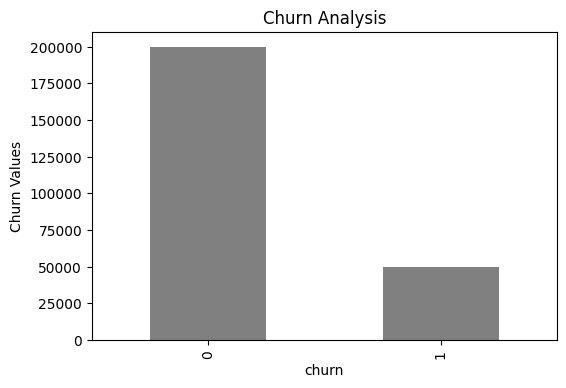

In [48]:
df['churn'].value_counts().plot(kind='bar', color='grey',figsize=(6,4))
plt.title("Churn Analysis")
plt.xlabel("churn")
plt.ylabel("Churn Values")
plt.show()

In [41]:
df['returns'].value_counts()

returns
0.0        101635
1.0        100769
Unknown     47596
Name: count, dtype: int64

In [42]:
df['returns'].value_counts(normalize=True) * 100

returns
0.0        40.6540
1.0        40.3076
Unknown    19.0384
Name: proportion, dtype: float64

In [37]:
df['payment_method'].value_counts()

payment_method
Credit Card    100486
PayPal          74837
Cash            49894
Crypto          24783
Name: count, dtype: int64

In [38]:
df['payment_method'].value_counts(normalize=True) * 100

payment_method
Credit Card    40.1944
PayPal         29.9348
Cash           19.9576
Crypto          9.9132
Name: proportion, dtype: float64

In [ ]:
### Observation: over 40% of the Credit card payments users dominates more compared to other payment methods

In [34]:
# Exploring the value disturbution
df['product_category'].value_counts()

product_category
Clothing       75052
Books          74912
Electronics    50185
Home           49851
Name: count, dtype: int64

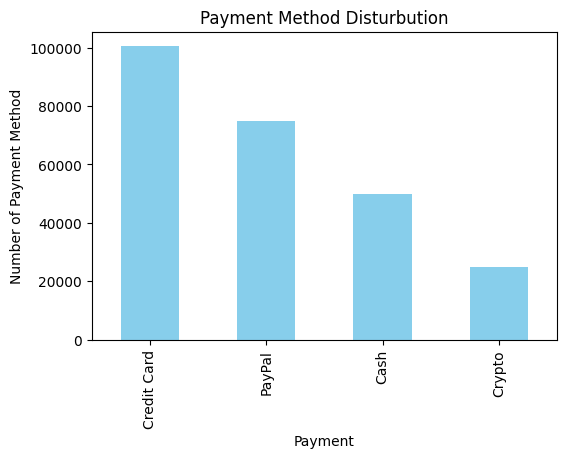

In [39]:
df['payment_method'].value_counts().plot(kind='bar' , color='skyblue',figsize=(6,4))
plt.title("Payment Method Disturbution")
plt.xlabel("Payment")
plt.ylabel("Number of Payment Method")
plt.show()

In [35]:
# Calculating the share value
df['product_category'].value_counts(normalize=True) * 100

product_category
Clothing       30.0208
Books          29.9648
Electronics    20.0740
Home           19.9404
Name: proportion, dtype: float64

🎯 Step 2: Translate Numbers Into Meaning👇

Observation: Clothing and Books dominate the transactions, together accounting for ~60% of total purchases.
Interpretation: These two categories are the company’s core revenue drivers or customer engagement magnets.
Hypothesis: Customers likely buy Clothing and Books more frequently due to affordability, variety, or recurring demand.
Next step: Validate if higher volume also means higher revenue or profitability. (Sometimes Electronics have fewer sales but higher value per sale.)

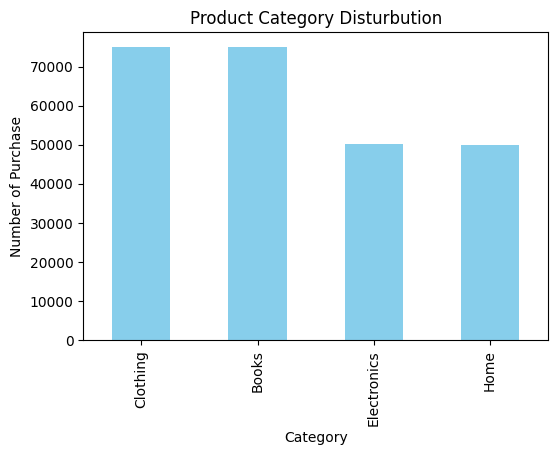

In [36]:
# Visualizing storytelling (for Dashboard or Report)
import matplotlib.pyplot as plt
df['product_category'].value_counts().plot(kind='bar' ,color ='skyblue',figsize=(6,4))
plt.title("Product Category Disturbution")
plt.xlabel("Category")
plt.ylabel("Number of Purchase")
plt.show()



## 🧩 Step 1: Read the Raw Output

| Product Category | Count  |
| ---------------- | ------ |
| Clothing         | 75,052 |
| Books            | 74,912 |
| Electronics      | 50,185 |
| Home             | 49,851 |

➡️ Total records = 75,052 + 74,912 + 50,185 + 49,851 = **≈ 2,50,000 transactions**

---

## 🎯 Step 2: Translate Numbers Into Meaning

As a **McKinsey analyst**, you never just say “Clothing = 75,052.”
You say **what it means for business** 👇

> **Observation:** Clothing and Books dominate the transactions, together accounting for ~60% of total purchases.
> **Interpretation:** These two categories are the company’s **core revenue drivers** or **customer engagement magnets**.
> **Hypothesis:** Customers likely buy Clothing and Books more frequently due to **affordability**, **variety**, or **recurring demand**.
> **Next step:** Validate if higher *volume* also means higher *revenue* or *profitability*. (Sometimes Electronics have fewer sales but higher value per sale.)

---

## 🧮 Step 3: Support with Quick Metrics (Analyst Habit)

You can calculate % share:

```python
df['product_category'].value_counts(normalize=True) * 100
```

Likely output:

| Category    | Share (%) |
| ----------- | --------- |
| Clothing    | ~30%      |
| Books       | ~30%      |
| Electronics | ~20%      |
| Home        | ~20%      |

🧠 **Interpretation:**

* Clothing and Books = **High engagement, possibly low margins**
* Electronics and Home = **Lower frequency, possibly high value**

This is called a **Portfolio Balance Insight** — a consulting-style framing.

---

## 💡 Step 4: McKinsey-Style Insight Framing (Pyramid Principle)

Always structure insights in 3 layers:

> **Main Insight (Top of Pyramid):**
> Clothing and Books contribute the majority of customer transactions, suggesting they are key engagement categories.

> **Supporting Evidence (Middle Layer):**
> Together they represent nearly 60% of all orders, while Electronics and Home together form the remaining 40%.

> **Recommendation (Bottom Layer):**
> Focus marketing and personalization on Clothing and Books for customer retention, while designing premium upselling campaigns for Electronics and Home.

---

## 📊 Step 5: Visual Storytelling (For Dashboard or Report)

Create a bar chart to visualize dominance:

```python
import matplotlib.pyplot as plt
df['product_category'].value_counts().plot(kind='bar', color='skyblue', figsize=(6,4))
plt.title("Product Category Distribution")
plt.xlabel("Category")
plt.ylabel("Number of Purchases")
plt.show()
```

In your report or LinkedIn post, you could write:

> 🧠 **Insight #1 — Category Mix:**
> Clothing and Books drive 60% of total customer purchases, positioning them as the company’s core engagement segments.
> Strategic focus on these categories can strengthen repeat purchase behavior and brand stickiness.

---

## 🚀 Step 6: Analyst’s Next Moves (What to Explore Next)

Now that you know which categories dominate, the next-level McKinsey-style questions are:

1. **Revenue Impact:**

   > Are Clothing and Books also contributing the most revenue or just more volume?

   ```python
   df.groupby('product_category')['total_purchase_amount'].sum().sort_values(ascending=False)
   ```
2. **Profitability:**

   > Which category gives the highest average order value (AOV)?
3. **Churn or Returns:**

   > Are high-return rates concentrated in any specific category?
4. **Customer Segments:**

   > Which age or gender buys which category the most?




In [49]:
# Start descriptive Analysis
df.describe()

,customer_id,purchase_date,product_price,quantity,total_purchase_amount,customer_age,churn,month,year
count,250000.00000,250000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,25004.03624,2021-11-06 23:31:24.372304384,254.659512,2.998896,2725.370732,43.940528,0.199496,6.186388,2021.377992
min,1.00000,2020-01-01 00:15:00,10.000000,1.000000,100.000000,18.000000,0.000000,1.000000,2020.000000
25%,12497.75000,2020-12-02 19:33:23.249999872,132.000000,2.000000,1477.000000,31.000000,0.000000,3.000000,2020.000000
50%,25018.00000,2021-11-06 13:10:59,255.000000,3.000000,2724.000000,44.000000,0.000000,6.000000,2021.000000
75%,37506.00000,2022-10-11 03:42:32.750000128,377.000000,4.000000,3974.000000,57.000000,0.000000,9.000000,2022.000000
max,50000.00000,2023-09-15 12:24:08,500.000000,5.000000,5350.000000,70.000000,1.000000,12.000000,2023.000000
std,14428.27959,NaN,141.568577,1.414694,1442.933565,15.350246,0.399622,3.353738,1.077485


# EDA

### Pillar 1: Customer Demographics
Goal: Understand who your customers are and identify segments that matter.




customer_age
70    14146553
64    14013477
58    13927143
51    13869252
68    13533099
Name: total_purchase_amount, dtype: int64
gender
Female    342462421
Male      338880262
Name: total_purchase_amount, dtype: int64


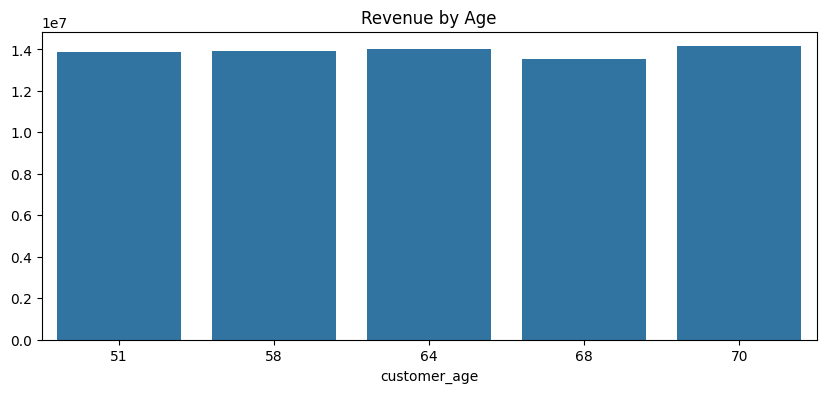

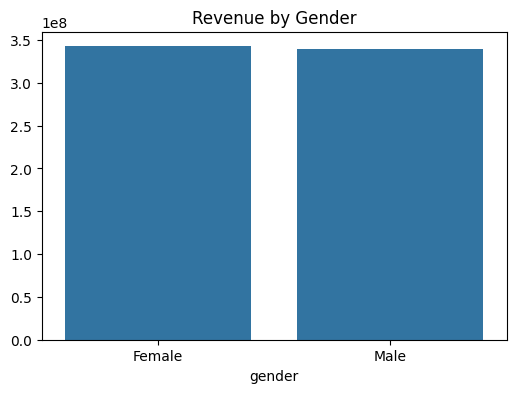

In [71]:
# Age group revenue
age_revenue = df.groupby('customer_age')['total_purchase_amount'].sum().sort_values(ascending=False).head(5)
print(age_revenue)

# Gender revenue
gender_revenue = df.groupby('gender')['total_purchase_amount'].sum().sort_values(ascending=False)
print(gender_revenue)

# Visualization
plt.figure(figsize=(10,4))
sns.barplot(x=age_revenue.index, y=age_revenue.values)
plt.title("Revenue by Age")
plt.show()

plt.figure(figsize=(6,4))
sns.barplot(x=gender_revenue.index, y=gender_revenue.values)
plt.title("Revenue by Gender")
plt.show()


## Both male and female genders as similar contribution in revenue.

In [83]:
# Step 3: Age Group & Gender Spending Patterns

# If you don’t have age groups, create them:

bins = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ['<18','18-25','26-35','36-45','46-55','56-65','65+']
df['age_group'] = pd.cut(df['customer_age'], bins=bins, labels=labels)


In [85]:
## Revenue by Age Group and Gender:

age_gender_revenue = df.groupby(['age_group', 'gender'])['total_purchase_amount'].sum().unstack()
print(age_gender_revenue)


gender       Female      Male
age_group                    
<18         6542493   6554355
18-25      43633708  43674049
26-35      63394842  61174055
36-45      63753912  64158480
46-55      64652048  64455432
56-65      66837632  65037097
65+        33647786  33826794


C:\Users\Jayasurya R N\AppData\Local\Temp\ipykernel_12244\4164532787.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_gender_revenue = df.groupby(['age_group', 'gender'])['total_purchase_amount'].sum().unstack()


### 26 - 65 age-group generated the more revenue by age group.

product_category
Books          204939601
Clothing       204532405
Electronics    136599467
Home           135271210
Name: total_purchase_amount, dtype: int64


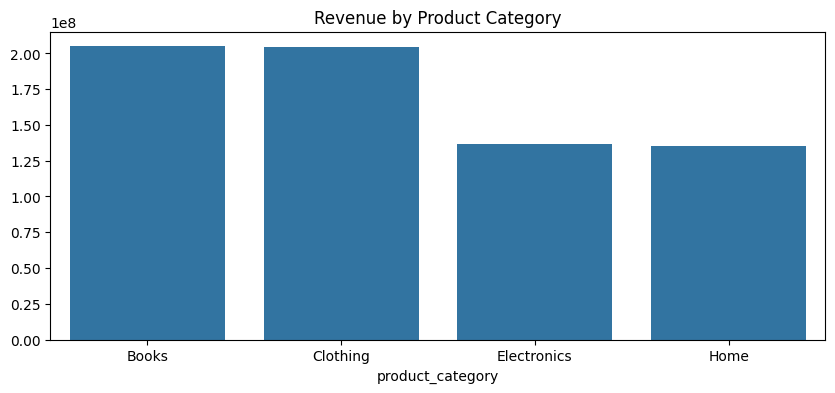

In [73]:
##2️⃣ Product Analysis (Revenue & Returns by Category)

##Goal: Identify top-performing product categories and high return categories.

# Revenue by category
category_revenue = df.groupby('product_category')['total_purchase_amount'].sum().sort_values(ascending=False)
print(category_revenue)


# Visualization
plt.figure(figsize=(10,4))
sns.barplot(x=category_revenue.index, y=category_revenue.values)
plt.title("Revenue by Product Category")
plt.show()


### Books and clothing categories generated the 70% Revenue, whereas other categories generated the 30% of revenue.

payment_method
Credit Card    50301
PayPal         37414
Cash           24882
Crypto         12366
Name: count, dtype: int64


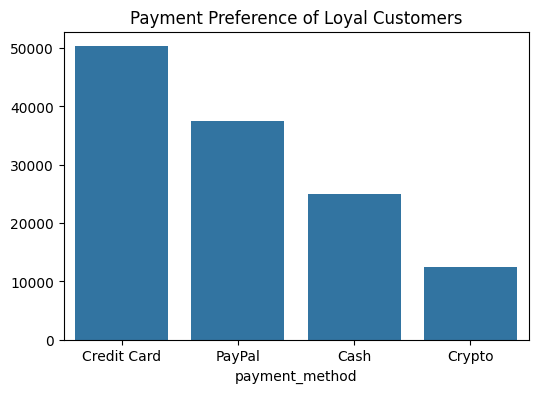

In [76]:
# 3️⃣ Payment Behavior Analysis

# Goal: Identify preferred payment method of loyal customers.

# Define loyal customers (example: purchases > median)
median_purchase = df['total_purchase_amount'].median()
loyal_customers = df[df['total_purchase_amount'] > median_purchase]

# Payment method preference
payment_pref = loyal_customers['payment_method'].value_counts()
print(payment_pref)

# Visualization
plt.figure(figsize=(6,4))
sns.barplot(x=payment_pref.index, y=payment_pref.values)
plt.title("Payment Preference of Loyal Customers")
plt.show()


### Insights: Our loyal customers more likely will use credit card we can partnerships with credit cards platforms

### 4️⃣ Churn Analysis

In [81]:
# 4️⃣ Churn Analysis

# Goal: Find who churns the most.

# If your dataset has individual customers with ages and churn flags:
df.groupby('customer_age')['churn'].sum().sort_values(ascending=False).head(10)



customer_age
18    1131
41    1108
46    1065
21    1059
22    1054
49    1048
58    1046
29    1044
61    1031
60    1028
Name: churn, dtype: int64

### Age group: 18-60 is highest churn rate, we can create the loyalty program dicounts, or engagement emails.

In [86]:
# Identity who spends the most, usefull for retention strategies
top_customers = df.groupby('customer_id')['total_purchase_amount'].sum().sort_values(ascending=False).head(10)
print(top_customers)


customer_id
36437    55339
39817    51718
26977    48497
5844     46541
3576     46518
13802    46464
809      45738
47087    45700
14400    45334
20305    45044
Name: total_purchase_amount, dtype: int64


## Business Insights

### 1) 26 - 65 age-group generated the more revenue by age group.
### 2) Books and clothing categories generated the 70% Revenue, whereas other categories generated the 30% of revenue.
### 3) Insights: Our loyal customers more likely will use credit card we can partnerships with credit cards platforms
### 4) Age group: 18-60 is highest churn rate, we can create the loyalty program dicounts, or engagement emails.